In [22]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pretty_midi
import os
from mido import Message, MidiFile, MidiTrack
import utils
import midiFile

In [24]:
midi_path = 'midis/TLS-1.mid'
theMidiFile = midiFile.MidiFile(midi_path)
pm = pretty_midi.PrettyMIDI(midi_path)
pm.remove_invalid_notes()

In [26]:
ticks_per_beat = theMidiFile.midi_file.ticks_per_beat
beats = pm.get_beats()
ticks = np.array([pm.time_to_tick(t) for t in beats]) # convert sec to tick
print(f"ticks per beat: {ticks_per_beat}")
print(f"ticks per measure: {theMidiFile.current_ticks_per_measure}")
print(f"ticks: {ticks}")

ticks per beat: 384
ticks per measure: 768.0
ticks: [    0   384   768  1152  1536  1920  2304  2688  3072  3456  3840  4224
  4608  4992  5376  5760  6144  6528  6912  7296  7680  8064  8448  8832
  9216  9600  9984 10368 10752 11136 11520 11904 12288 12672 13056 13440
 13824 14208 14592 14976 15360 15744 16128 16512 16896 17280 17664 18048
 18432 18816 19200 19584 19968 20352 20736 21120 21504 21888 22272 22656
 23040 23424 23808 24192 24576 24960 25344 25728 26112 26496 26880 27264
 27648 28032 28416 28800 29184 29568 29952 30336 30720 31104 31488 31872
 32256 32640 33024 33408 33792 34176 34560 34944 35328 35712 36096]


### Transcription

MIDI files are at their core a way of storing a score of a piece of music, so the MIDI files in the Lakh MIDI dataset can be used to obtain a transcription of the audio files they are matched and aligned to.  `pretty_midi`'s `get_piano_roll()` method provides a convenient way of getting a "piano roll representation" of the transcription.

In [5]:
# Retrieve piano roll of the MIDI file
all_piano_rolls = pm.get_piano_roll() # get the piano roll of all the instruments 
instruments = pm.instruments
print(f"Instruments: {instruments}")
print(f"Piano rolls shape (128 keynotes): {all_piano_rolls.shape}")

Instruments: [Instrument(program=0, is_drum=False, name="Piano")]
Piano rolls shape (128 keynotes): (128, 3025)


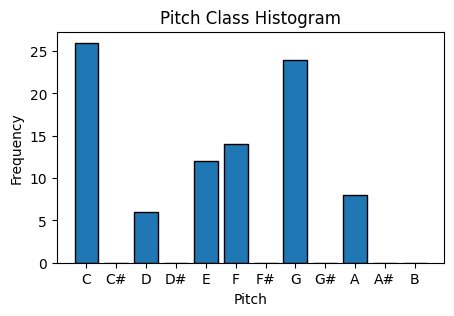

In [6]:
thePiano = pm.instruments[0]
# thePiano.notes
pitch_class_histogram = thePiano.get_pitch_class_histogram() # pitch class = C(0), C#(1), D(1) ... A#(10), B(11)
piano_pitches = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

# Create the bar chart
plt.figure(figsize=(5, 3))
plt.bar(piano_pitches, pitch_class_histogram, edgecolor='black')

# Add title and labels
plt.title('Pitch Class Histogram')
plt.xlabel('Pitch')
plt.ylabel('Frequency')

# Show the plot
plt.show()

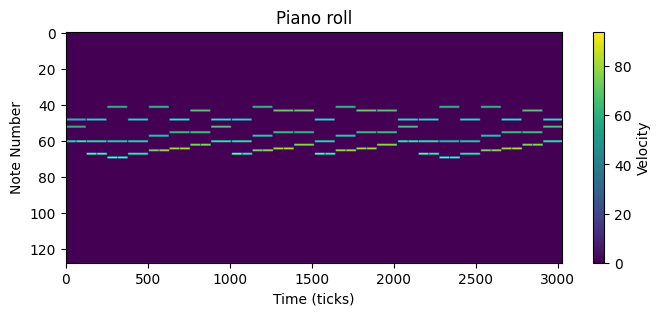

In [21]:
thePiano_piano_roll = thePiano.get_piano_roll()
plt.figure(figsize=(8, 3))
plt.imshow(thePiano_piano_roll, aspect='auto', cmap='viridis')  # 'aspect' set to 'auto' for better aspect ratio handling
cb = plt.colorbar()  # Add a colorbar to show the scale
cb.set_label('Velocity')
plt.title('Piano roll')
plt.xlabel('Time (ticks)')
plt.ylabel('Note Number')
plt.show()

In [14]:
intervals = np.array([(pm.time_to_tick(note.start), pm.time_to_tick(note.end)) for note in thePiano.notes])
notes = np.array([note.pitch for note in thePiano.notes])
notes = notes.reshape(-1, 1)
note_interval = np.concatenate((notes, intervals), 1)
note_interval

array([[   60,     0,   244],
       [   52,     0,   487],
       [   48,     0,   487],
       [   60,   256,   500],
       [   67,   512,   756],
       [   60,   512,   999],
       [   48,   512,   999],
       [   67,   768,  1012],
       [   69,  1024,  1268],
       [   60,  1024,  1511],
       [   41,  1024,  1511],
       [   69,  1280,  1524],
       [   67,  1536,  2023],
       [   60,  1536,  2023],
       [   48,  1536,  2023],
       [   65,  2048,  2292],
       [   57,  2048,  2535],
       [   41,  2048,  2535],
       [   65,  2304,  2548],
       [   64,  2560,  2804],
       [   55,  2560,  3047],
       [   48,  2560,  3047],
       [   64,  2816,  3060],
       [   62,  3072,  3316],
       [   55,  3072,  3559],
       [   43,  3072,  3559],
       [   62,  3328,  3572],
       [   60,  3584,  4071],
       [   52,  3584,  4071],
       [   48,  3584,  4071],
       [   67,  4096,  4340],
       [   60,  4096,  4583],
       [   48,  4096,  4583],
       [  

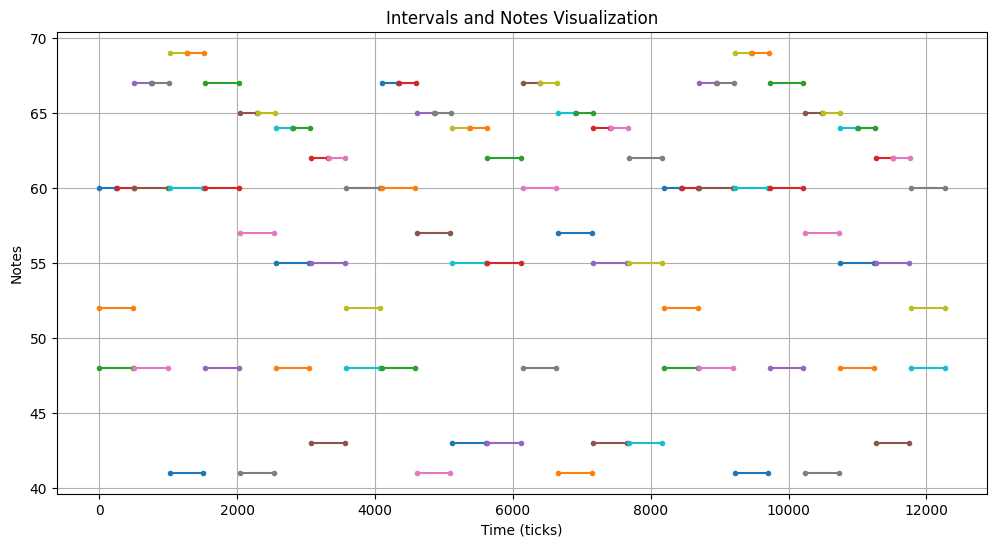

In [9]:
# Create a plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot intervals as horizontal lines
for i, interval in enumerate(intervals):
    ax.plot(interval, [notes[i], notes[i]], marker='.')

# Customize the plot
ax.set_title('Intervals and Notes Visualization')
ax.set_xlabel('Time (ticks)')
ax.set_ylabel('Notes')
ax.grid(True)